# Exploratory Data Anlysis

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go

## S1: Data Description

1. Read in csv file into pandas dataframe

In [3]:
data_df = pd.read_csv("all_data.csv")

In [4]:
original_df = pd.read_csv('all_data.csv')

2. Visualize the dataframe to gain a basic understanding of features and samples

In [5]:
data_df.head()

,state,education,year,state_legislature,governor,lt_governor,labour_force_participation,mngmt_job_wage_gap,bachelor_wage_gap,ab_legality,rape_rate,sex_ratio_birth,abortion_rate,life_exp_f_m
0,Alabama,1.180,2020,0.157,1.0,0.0,0.782,0.640,25.1,0,32.7,1.068376,113.548,1.089325
1,Alaska,1.014,2020,0.367,0.0,0.0,0.795,0.779,18.1,1,154.8,0.915751,164.547,1.066098
2,Arizona,1.112,2020,0.389,0.0,0.0,0.789,0.701,23.2,1,44.0,1.012146,184.862,1.083424
3,Arkansas,1.115,2020,0.259,0.0,0.0,0.837,0.705,20.1,0,73.5,1.037344,104.638,1.077586
4,California,1.099,2020,0.308,0.0,1.0,0.764,0.734,18.6,1,34.2,1.011122,16.075,1.076426


In [4]:
data_df.columns

Index(['state', 'education', 'year', 'state_legislature', 'governor',
       'lt_governor', 'labour_force_participation', 'mngmt_job_wage_gap',
       'bachelor_wage_gap', 'ab_legality', 'rape_rate', 'sex_ratio_birth',
       'abortion_rate', 'life_exp_f_m'],
      dtype='object')

In [5]:
round(data_df.describe() ,3)

,education,year,state_legislature,governor,lt_governor,labour_force_participation,mngmt_job_wage_gap,bachelor_wage_gap,ab_legality,rape_rate,sex_ratio_birth,abortion_rate,life_exp_f_m
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,1.113,2015.500,0.254,0.128,0.248,0.829,0.711,20.284,0.720,41.277,1.024,226.896,1.065
std,0.046,2.875,0.076,0.334,0.432,0.041,0.044,3.644,0.449,17.820,0.032,268.040,0.009
min,0.947,2011.000,0.094,0.000,0.000,0.732,0.568,10.200,0.000,11.400,0.899,2.714,1.044
25%,1.085,2013.000,0.199,0.000,0.000,0.803,0.683,18.200,0.000,31.075,1.009,121.059,1.059
50%,1.117,2015.500,0.253,0.000,0.000,0.826,0.709,20.100,1.000,38.600,1.030,188.740,1.064
75%,1.141,2018.000,0.304,0.000,0.000,0.862,0.736,22.225,1.000,47.100,1.048,257.928,1.071
max,1.243,2020.000,0.540,1.000,1.000,0.929,0.841,32.100,1.000,161.600,1.074,3700.745,1.096


We have 500 samples and 15 features

3. Check missing values

In [6]:
null_sum = data_df.isnull().sum()
null_sum

state                         0
education                     0
year                          0
state_legislature             0
governor                      0
lt_governor                   0
labour_force_participation    0
mngmt_job_wage_gap            0
bachelor_wage_gap             0
ab_legality                   0
rape_rate                     0
sex_ratio_birth               0
abortion_rate                 0
life_exp_f_m                  0
dtype: int64

There is no missing data in our dataset, because when we collected data for seperate features, our data source was census data which appeared to contain no NaN

4. Check column types

In [7]:
data_df.dtypes

state                          object
education                     float64
year                            int64
state_legislature             float64
governor                      float64
lt_governor                   float64
labour_force_participation    float64
mngmt_job_wage_gap            float64
bachelor_wage_gap             float64
ab_legality                     int64
rape_rate                     float64
sex_ratio_birth               float64
abortion_rate                 float64
life_exp_f_m                  float64
dtype: object

## S2: Visualization of relation between features and target value

### 1. Explore the relation between political empowerment and rape rate

Text(0.5, 1.0, 'Bar graph between female governer and rape rate')

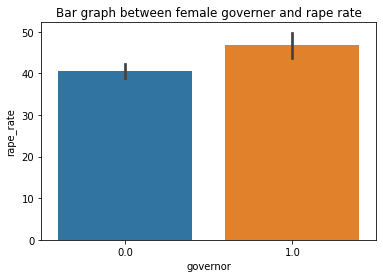

In [18]:
sns.barplot(data=data_df, x="governor", y="rape_rate")
plt.title("Bar graph between female governer and rape rate")

Text(0.5, 1.0, 'Bar graph between female lieutenant governer and rape rate')

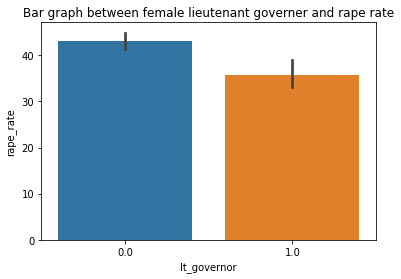

In [19]:
sns.barplot(data=data_df, x="lt_governor", y="rape_rate")
plt.title("Bar graph between female lieutenant governer and rape rate")

Use boxplot to detect and drop outliers

In [6]:
Q1 = data_df["state_legislature"].quantile(0.25)
Q3 = data_df["state_legislature"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.199, 0.30425, 0.041124999999999995, 0.462125)

In [7]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["state_legislature"] > 0.462].index, inplace=True)
data_df.drop(data_df[data_df["state_legislature"] < 0.041].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (500, 14)
Data size after dropping: (498, 14)


### 2. Explore the relation between education gender gap and rape rate

2.1 Use boxplot to detect and drop outliers

In [8]:
# Detect high school graduates gender gap outliers
Q1 = data_df["education"].quantile(0.25)
Q3 = data_df["education"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.08525, 1.141, 1.0016250000000002, 1.224625)

In [9]:
# Drop high school graduates gender gap outliers
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["education"] > 1.2].index, inplace=True)
data_df.drop(data_df[data_df["education"] < 0.8].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (498, 14)
Data size after dropping: (495, 14)


### 3. Explore the relation between economic gender gap and rape rate

3.1 Use boxplot to detect and drop outliers for economic gender gap

In [10]:
# Detect labor force participation gender gap
Q1 = data_df["labour_force_participation"].quantile(0.25)
Q3 = data_df["labour_force_participation"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.803, 0.863, 0.7130000000000001, 0.9529999999999998)

In [11]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["labour_force_participation"] > 0.951].index, inplace=True)
data_df.drop(data_df[data_df["labour_force_participation"] < 0.716].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (495, 14)
Data size after dropping: (495, 14)


In [12]:
# Detect labor management job wage gender gap gender gap
Q1 = data_df["mngmt_job_wage_gap"].quantile(0.25)
Q3 = data_df["mngmt_job_wage_gap"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.683, 0.736, 0.6035000000000001, 0.8154999999999999)

In [13]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["mngmt_job_wage_gap"] > 0.808].index, inplace=True)
data_df.drop(data_df[data_df["mngmt_job_wage_gap"] < 0.613].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (495, 14)
Data size after dropping: (477, 14)


In [14]:
# Detect bachelor wage gender gap
Q1 = data_df["bachelor_wage_gap"].quantile(0.25)
Q3 = data_df["bachelor_wage_gap"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(18.3, 22.1, 12.6, 27.800000000000004)

In [15]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["bachelor_wage_gap"] > 28.5].index, inplace=True)
data_df.drop(data_df[data_df["bachelor_wage_gap"] < 12.5].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (477, 14)
Data size after dropping: (468, 14)


### 4. Explore the relation between health gender gap and rape rate

4.1 Use boxplot to detect and drop outliers for health gender gap

In [16]:
# Detect life expectancy gender gap
Q1 = data_df["life_exp_f_m"].quantile(0.25)
Q3 = data_df["life_exp_f_m"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.0593220338983051,
 1.0698049903239473,
 1.0435975992598419,
 1.0855294249624103)

In [17]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["life_exp_f_m"] > 1.08].index, inplace=True)
data_df.drop(data_df[data_df["life_exp_f_m"] < 1.05].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (468, 14)
Data size after dropping: (450, 14)


In [18]:
# Detect sex ratio at birth gender gap
Q1 = data_df["sex_ratio_birth"].quantile(0.25)
Q3 = data_df["sex_ratio_birth"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(1.0101010101010102, 1.0482180293501049, 0.9529254812273681, 1.105393558223747)

In [19]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["sex_ratio_birth"] > 1.10].index, inplace=True)
data_df.drop(data_df[data_df["sex_ratio_birth"] < 0.95].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (450, 14)
Data size after dropping: (436, 14)


### 5. Explore relation between abortion and rape rate

Text(0.5, 1.0, 'Bar graph between ab_legality and rape rate')

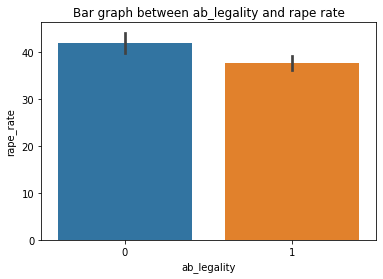

In [20]:
sns.barplot(data=data_df, x="ab_legality", y="rape_rate")
plt.title("Bar graph between ab_legality and rape rate")

In [21]:
# Detect abortion rate outliers
Q1 = data_df["abortion_rate"].quantile(0.25)
Q3 = data_df["abortion_rate"].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(123.14975, 264.38374999999996, -88.70124999999997, 476.23474999999996)

In [22]:
print("Data size before dropping:", data_df.shape)
data_df.drop(data_df[data_df["abortion_rate"] > 489.189].index, inplace=True)
data_df.drop(data_df[data_df["abortion_rate"] < 0].index, inplace=True)
print("Data size after dropping:", data_df.shape)

Data size before dropping: (436, 14)
Data size after dropping: (419, 14)


### A comprehensive visualization of the relationship between features and target variables

* Without dropping any outliers

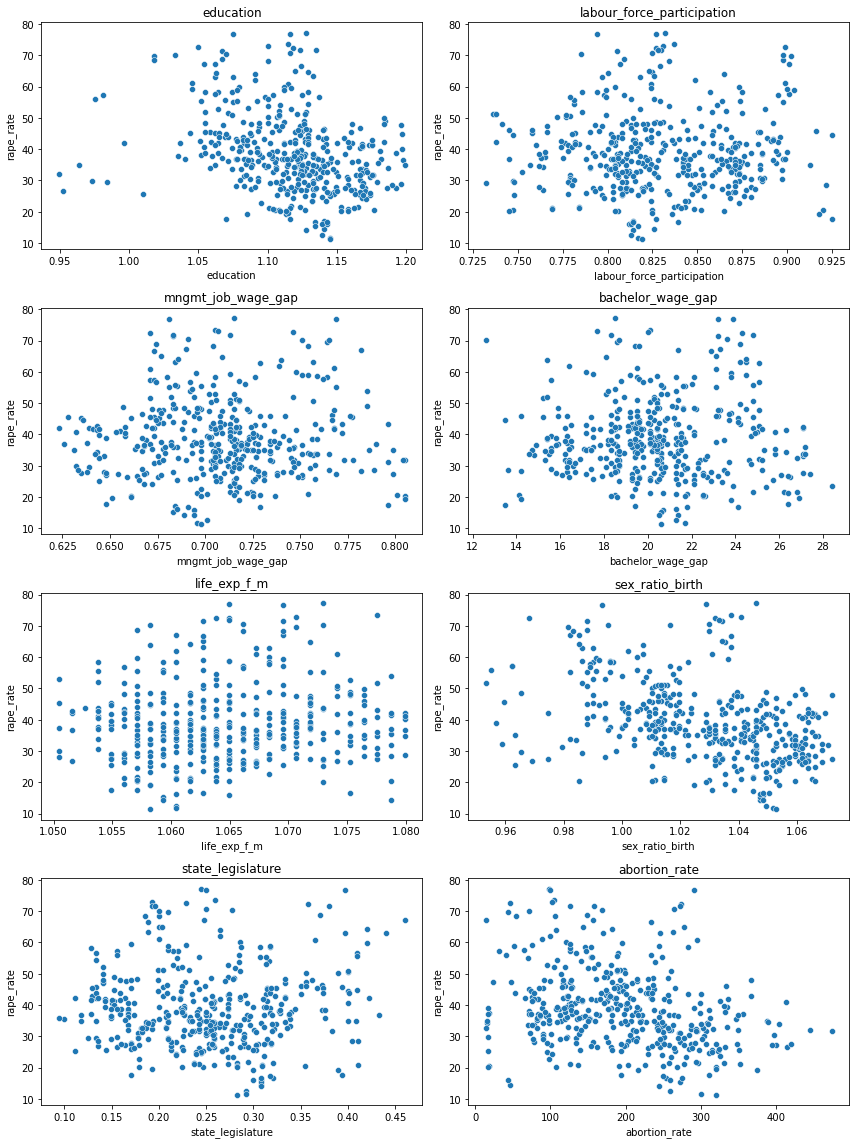

In [23]:
data = data_df[["education", "labour_force_participation", 
                "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
                "sex_ratio_birth", "state_legislature", "abortion_rate", "rape_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="rape_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations</b>

* From the first scattor plot, we observe a negative correlation between education and rape rate, which means females receiving more education is likely to correspond to a lower rape rate, which is intuitive and also proved by research.

* In the eighth plot, we see a negative relation between sex ratio at birth (female/male) and rape rate, which means the higher proportion of male at birth population is likely to correspond to a higher rape rate.

* From the last plot, we see a negative relation between abortion rate and rape rate.

* Overall, each individual feature is not strongly correlated to our target value -- rape rate. This is probabily because these features are interconnected and mediated by other hidden fators.

## S3: Visualization of Features and Distribution

### A Comprehensive Visualization

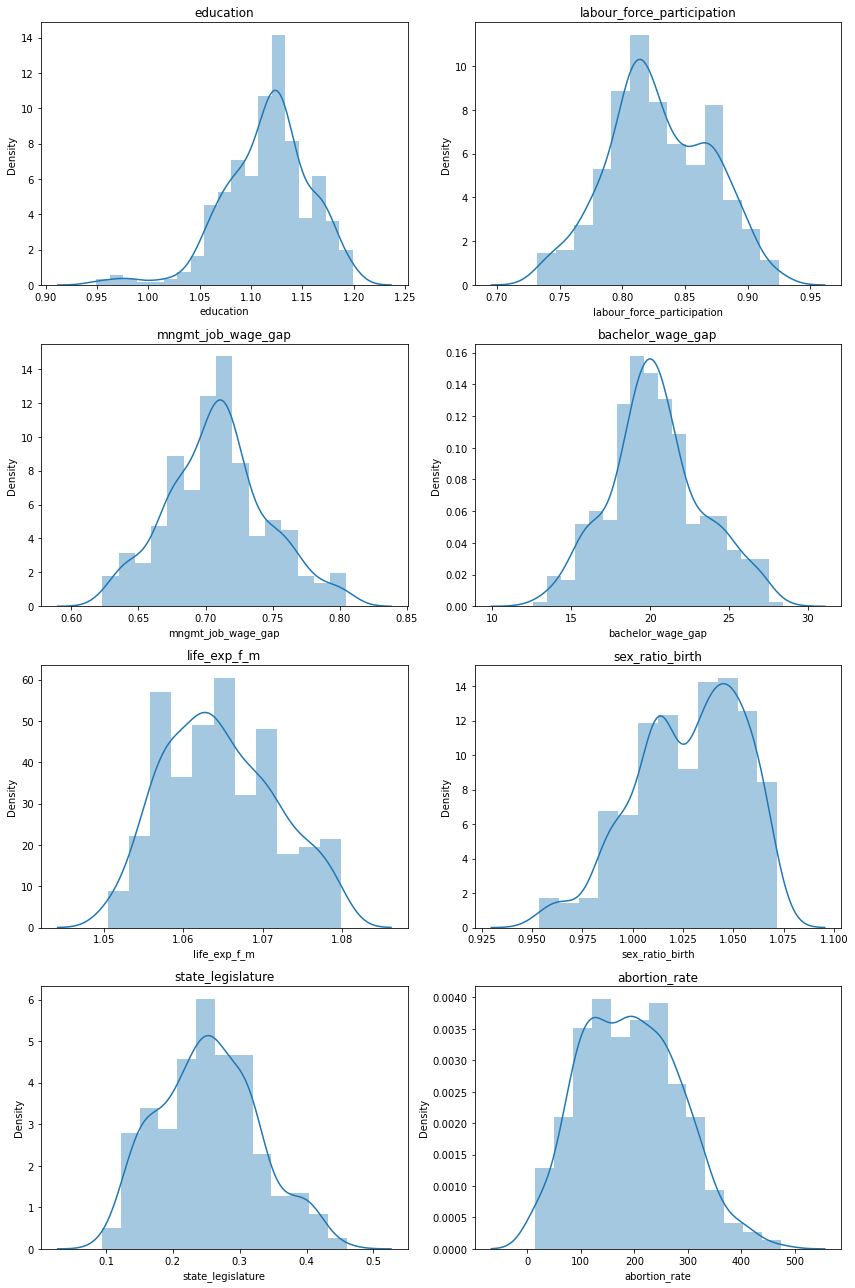

In [26]:
data = data_df[["education", "labour_force_participation", 
           "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
           "sex_ratio_birth", "state_legislature", "abortion_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns):
            sns.distplot(data[data.columns[col]], ax=axs[i][j], kde=True)
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations</b>

1. From the first distribution, we see that the mean of high school graduates gender gap is around 0.95. This means male comprise a larger proportion of the total high school graduates.

2. The second and third distributions show an opposite trend, in which bachelor and professional graduates are likely to consist of female, which a mean of 1.12 and 1.1 respectively. Compare the first three distribution graphs, we see that female are more likely to pursue a higher education degree.

3. We observe a significant gender gap in the economic field:
    * In the 4th graph, we see that the labor force participation distribution has a mean around 0.81 and skewed to the left. This mean and skewness indicate the male's dominance and female's marginalization in the labor force participation

    * In the 5th graph, we see that the management job wage gender gap has a mean of 0.71, which means that on average, women in management jobs earn 80% of what men earn in the same positions. This phenomenon indicates a salient gender gap in the work place, especially for the higher management positions

4. In the 7th graph, we see the distribution of life expectancy ratio has a mean of 0.941, which means male tends to live shorter than female, which makes sense as the World Health Organization (WHO) showed the global life expectancy at birth for males in 2020 was 69 years, while for females it was 73 years.

5. In the 9th graph, we see the distribution of state legislature of women has a mean of 0.27, which is critically low. This mean indicates that among all positions, of which female only occupy 27 percent.

## S4: Explore the Relation Between Features and Abortion Rate

### Complete Visualization between Features and Abortion Rate

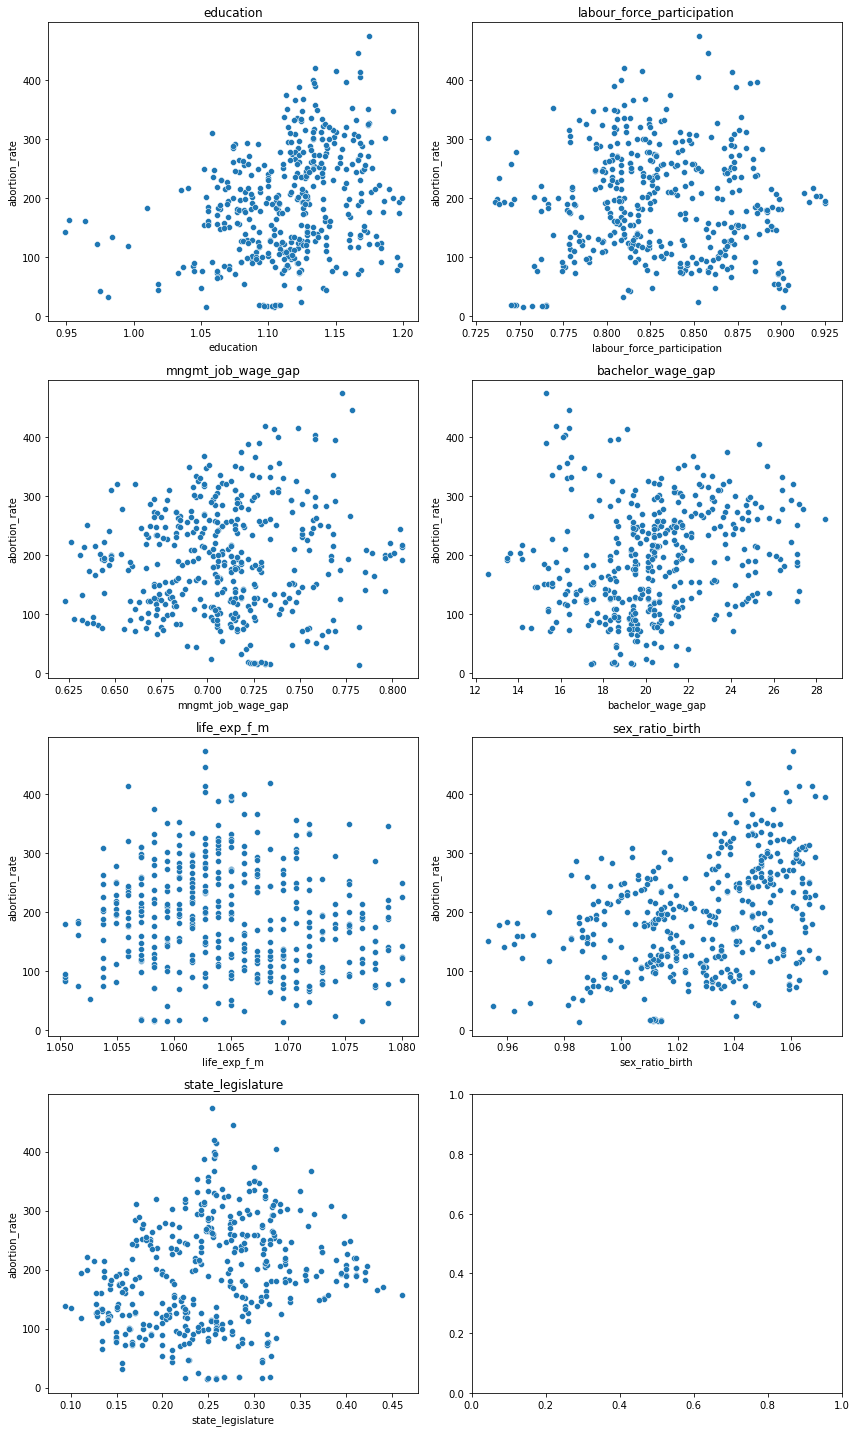

In [27]:
data = data_df[["education", "labour_force_participation", 
                "mngmt_job_wage_gap", "bachelor_wage_gap", "life_exp_f_m", 
                "sex_ratio_birth", "state_legislature", "abortion_rate"]]
fig, axs = plt.subplots(4, 2, figsize=(12, 20))

for i in range(4):
    for j in range(2):
        col = i*2 + j
        if col < len(data.columns) - 1:
            sns.scatterplot(data=data, x=data.columns[col], y="abortion_rate", ax=axs[i][j])
            axs[i][j].set_title(data.columns[col])

fig.tight_layout()
plt.show()

<b>Observations on relation between features and abortion rate</b>

* From the first plot, we observe a positive correlation between education and abortion rate, which means more females receiving education than males is related to higher abortion rate.

* From the sixth plot, we find a positive relation between sex ratio at birth and abortion rate, which means more females at birth than males is related to higher abortion rate.

## S5: Correlation Map

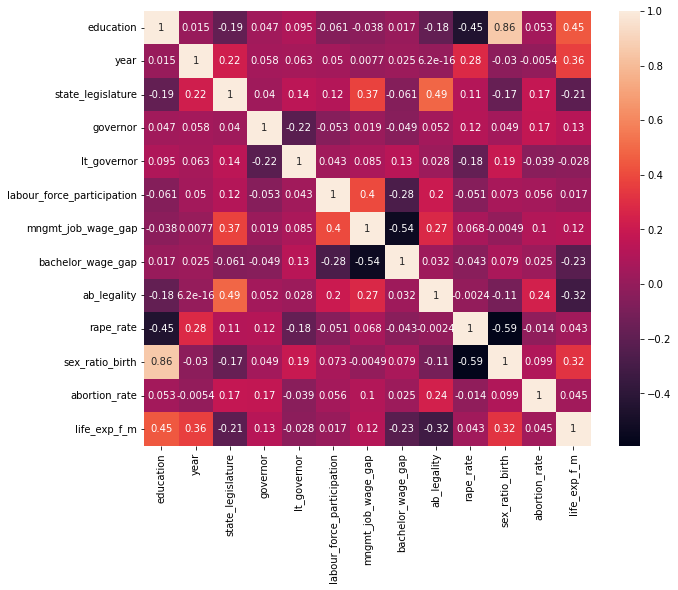

In [63]:
corrMtx = original_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrMtx, annot=True, ax=ax)
plt.show()

<b>Observations</b>

* The most salient correlations are between education and sex ratio, state legislature and abortion legality, education and life expectancy.

* Some correlations mentioned above, such as sex ratio at birth and abortion rate, do not seem highly correlated in the correlation matrix, probably because they have non-linear correlations.

## S6: Visualization of Important Features by State Groups

* We explore the following features by grouping states based on 2020 data and display the top, bottom, and middle group to observe the trends.
    * state_legislature
    * mngmt_job_wage_gap
    * life_exp_f_m
    * abortion_rate
    * rape_rate

In [10]:
# Set the figure parameters
sns.set_style('whitegrid')
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

In [17]:
def gen_figure(df, col_name, fig_title, y_axis_title):
    ''' This function creates a plotly figure object with the given params. '''
    
    # Calculate the rank percentage for each state in 2011
    df['pct_rank'] = df[df['year'] == 2020][col_name].rank(pct=True)

    # Divide states into three groups based on rank percentage
    df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], 
                         labels=[r'bottom 10%', r'10%-45%', r'45%-55%', r'55%-90%', r'top 10%'])

    # Process each state's data individually and store it in a dictionary
    states_data = {}
    for state, data in df.groupby('state'):
        # Sort the data by year
        data = data.sort_values('year')
        # Construct Plotly's Trace object
        trace = go.Scatter(
            x=data['year'],
            y=data[col_name],
            name=state,
            line=dict(width=2),
            mode='lines',
            text=data[col_name],
            hovertemplate='<b>%{text:.2f}%</b><brstate: %{name}<br>year: %{x}'
        )
        # Assign the corresponding color according to which group the state belongs to
        if r'bottom 10%' in data['group'].unique():
            trace.update(line=dict(color='#750D86'))
            states_data[state] = trace

        elif r'top 10%' in data['group'].unique():
            trace.update(line=dict(color='#FEAF16'))
            states_data[state] = trace

        elif r'45%-55%' in data['group'].unique():
            trace.update(line=dict(color='#00AB8B'))
            states_data[state] = trace

    # Construct Plotly's Figure object
    fig = go.Figure(list(states_data.values()))

    # Add a chart title and axis labels
    fig.update_layout(title=fig_title,
                    title_font_size=24,
                    legend_title='States:',
                    xaxis_title='Year',
                    yaxis_title=y_axis_title,
                    width=1000,
                    height=600)
    return fig

### 5.1 State Legislature by Year

In [18]:
gen_figure(data_df, 'state_legislature', 'State Legislature by Year', 'Female Proportion in State Legislature').show()

<h4> State legislature</h4>

* Proportion of women in legislature.
* In general, the trend is steady before 2018, with a slight increase after.
    * Colorado: stays the top 1 in female proportion in state legislature. 2018-2019 shows a sharp increase.
    * Hawaii: moved from the top 10% to the middle range (45%-55%)
    * Alaska: moved from the last in the middle range to the top 10% range
    * Oklahoma: shows a sharp increase from 2018-2019.

### 5.2 Management Job Wage Gap by Year

In [19]:
gen_figure(data_df, 'mngmt_job_wage_gap', 'Management Job Wage Gap by Year', 'Management Job Wage Gap').show()

<h4> Management job wage gap </h4>

* Proportion of female wage to male wage in management job.
* In general, the trend is steady before 2019, with a slight increase after.
    * Ohio: From 2014-2018, shows a relatively significant 
    * Utah: Observe a mild fluctuation between 2011 to 2019, then a sudden increase from 2019 to 2020

### 5.3 Life Expectancy by Year

In [21]:
gen_figure(data_df, 'life_exp_f_m', 'Life Expectancy (Female Over Male) by Year', 'Life Expectancy (female over male)')

<h4> Life Expectancy Gender Gap </h4>

* Life Expectancy of male over that of female
* In general, the trends across 15 states experience ocsilation at some extent. Furthermore, all 15 states share a decrease from 2019 to 2020. We also see some overlap between upper 10% states, the middle 10% states, and bottom 10% states

### 5.4 Abortion Rate by Year

In [22]:
gen_figure(data_df, 'abortion_rate', 'Abortion Rate by Year', 'Abortion Rate')

<h4> Abortion Rate </h4>

* Divided the abortion occurrences of a state by its population and multiply by 100,000
* In general, the trends across 13 states are steady and share a comparatively low abortion rate except for New Hamshire and New Mexico; also, the differences between each state's abortion rate are small
    * New Hamshire: Observe an conspicuously high abortion rate compared to its counterpart states and salient fluctuation compared to the rest of the states. However, it has a sudden decrease from 2018 to 2019 and an increase from 2019 to 2020
    * New Mexico: While sharing a similarly low and steady trend as its counterparts, it had a drastic increase from 2017 to 2018, followed by a sudden decrease from 2018 to 2019, and then another sharp increase from 2019 to 2020

### 5.5 Rape Rate by Year

In [20]:
gen_figure(data_df, 'rape_rate', 'Rape Rate by Year', 'Rape Rate')

<h4> Rape Rate </h4>

* Divided the rape occurrences of a state by its population and multiply by 100,000
* In general, the trends across 14 states are steady except for Alaska; also, the differences between each state's rape rate are small. We also see some overlap between the middle 10% states and bottom 10% states
    * Alaska: Observe an abnormal and salient fluctuation compared to the rest of the states. Furthermore, it has a significant higher rape rate than the rest of the states

In [24]:
q1 = data_df.groupby(['year'])['rape_rate'].quantile(0.25).reset_index()
q3 = data_df.groupby(['year'])['rape_rate'].quantile(0.75).reset_index()

# combine data
grouped = data_df.groupby(['year'])['rape_rate'].agg(['max', 'min', 'median']).reset_index()
grouped = pd.merge(grouped, q1, on='year')
grouped = pd.merge(grouped, q3, on='year')

# create scatter plot data
data = [
    go.Scatter(
        x=q3['year'],
        y=q3['rape_rate'],
        name='Upper Quartile',
        mode='markers+lines',
        line=dict(
            color='#EECA3B'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='#54A24B'
        )
    ),
    go.Scatter(
        x=q1['year'],
        y=q1['rape_rate'],
        name='Lower Quartile',
        mode='markers+lines',
        line=dict(
            color='#4C78A8'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='#9467BD'
        )
    )
]

# create layout
layout = go.Layout(
    title='Rape Rate Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1000, height=600)
fig.show()